In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

First I will create the dataframes to be used in my analysis:

In [2]:
# Import the datset with all items that have 25+ reviews, save it in a name that matches
amazon25_df = pd.read_csv(r'rough_data\amazon_dataset\amzn_25plusreviews_final_format.csv')

In [3]:
# Save the subset of that information where product have 50+ reviews
amazon50_df = amazon25_df[:256227]

In [4]:
# Save the subset of that information where product have 100+ reviews
amazon100_df = amazon25_df[:112987]
amazon100_df

,item,average_rating,total_ratings,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings
0,B0054JZC6E,4.329313,25368.0,0.523810,0.330377,0.114436,0.014073,0.017305
1,B00FAPF5U0,4.369381,24024.0,0.637696,0.209832,0.079878,0.029346,0.043248
2,B009UX2YAC,4.674445,23956.0,0.788529,0.144056,0.038654,0.010853,0.017908
3,0439023483,4.644406,21398.0,0.770726,0.155529,0.039957,0.015001,0.018787
4,030758836X,3.794433,19867.0,0.388081,0.278351,0.160266,0.086525,0.086777
...,...,...,...,...,...,...,...,...
112982,B003LR3HNQ,4.480000,100.0,0.740000,0.120000,0.060000,0.040000,0.040000
112983,B000M4RG7E,3.820000,100.0,0.380000,0.340000,0.090000,0.100000,0.090000
112984,B007UNSJ3A,4.030000,100.0,0.450000,0.310000,0.120000,0.060000,0.060000
112985,B00FFINXBU,3.900000,100.0,0.490000,0.210000,0.120000,0.070000,0.110000


I started to create my ow functions for analyzing the data, then realized df.describe() does literlly eerything I was going to do for my preliminary analysis. So that makes it easy.

In [5]:
amazon100_df.describe()

,average_rating,total_ratings,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings
count,112987.000000,112987.000000,112987.000000,112987.000000,112987.000000,112987.000000,112987.000000
mean,4.154696,291.328525,0.587441,0.193820,0.085717,0.052039,0.080984
std,0.494084,527.980228,0.167000,0.071319,0.048208,0.039112,0.091191
min,1.020270,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.912281,125.000000,0.474652,0.143791,0.049795,0.022556,0.023256
50%,4.257489,171.000000,0.600000,0.188925,0.078261,0.043165,0.051370
75%,4.511177,281.000000,0.712829,0.237880,0.113636,0.072727,0.104972
max,5.000000,25368.000000,1.000000,0.548077,0.405941,0.386581,0.993243


In [6]:
amazon50_df.describe()

,average_rating,total_ratings,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings
count,256227.000000,256227.000000,256227.000000,256227.000000,256227.000000,256227.000000,256227.000000
mean,4.150180,166.901244,0.584797,0.194353,0.087593,0.052746,0.080511
std,0.513963,367.756439,0.175043,0.078978,0.054352,0.043368,0.095337
min,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.900000,64.000000,0.465517,0.138462,0.047619,0.019231,0.019231
50%,4.258741,90.000000,0.598291,0.188235,0.078652,0.042403,0.049645
75%,4.521127,156.000000,0.716667,0.242105,0.118056,0.075472,0.105263
max,5.000000,25368.000000,1.000000,0.716667,0.532258,0.397059,1.000000


In [7]:
amazon25_df.describe()

,average_rating,total_ratings,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings
count,534899.000000,534899.000000,534899.000000,534899.000000,534899.000000,534899.000000,534899.000000
mean,4.151016,97.804185,0.586496,0.192204,0.087776,0.052867,0.080657
std,0.542145,263.059102,0.185567,0.089486,0.062050,0.049550,0.101953
min,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.886863,33.000000,0.460938,0.129032,0.040000,0.016949,0.016667
50%,4.266667,48.000000,0.600000,0.185185,0.076923,0.040000,0.046512
75%,4.541899,87.000000,0.725490,0.245161,0.121212,0.076923,0.107143
max,5.000000,25368.000000,1.000000,0.827586,0.588235,0.560000,1.000000


Now for the set of visualizations that I think will be helpful to give insght into my data:

Text(0, 0.5, 'Normalized Product Count')

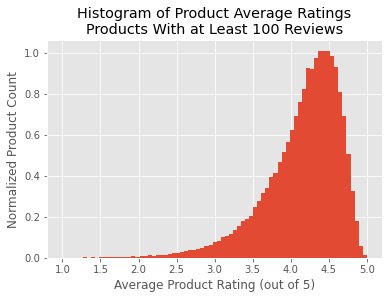

In [8]:
plt.hist(amazon100_df['average_rating'], bins=75, range=(1,5), density=True)
plt.title('Histogram of Product Average Ratings\nProducts With at Least 100 Reviews')
plt.xlabel('Average Product Rating (out of 5)')
plt.ylabel('Normalized Product Count')

Text(0, 0.5, 'Normalized Product Count')

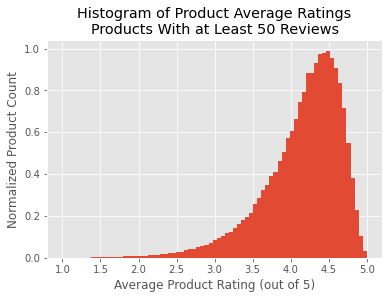

In [9]:
plt.hist(amazon50_df['average_rating'], bins=75, range=(1,5), density=True)
plt.title('Histogram of Product Average Ratings\nProducts With at Least 50 Reviews')
plt.xlabel('Average Product Rating (out of 5)')
plt.ylabel('Normalized Product Count')

Text(0, 0.5, 'Normalized Product Count')

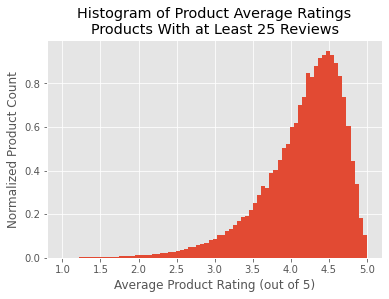

In [10]:
plt.hist(amazon25_df['average_rating'], bins=75, range=(1,5), density=True)
plt.title('Histogram of Product Average Ratings\nProducts With at Least 25 Reviews')
plt.xlabel('Average Product Rating (out of 5)')
plt.ylabel('Normalized Product Count')

I am surprised by the results. There is little significant variation in the distribution of average product ratings when dropping the minimum required reviews size to 25 from 100. This means for statistical measures, I can use a larger amount of the data than I had thought. Very nice. But now I need a way to determine cutoff size for the review data to use for my tool. I think maybe the best way is to conduct random sampling of a typically review-distributed product with a large review size, and determine what level is needed to get a large percentage of samples to have similar characteristics to the distribution it was sampled from. This is another level of the analysis that I will get to later.

Text(0.5, 0, 'Rating Category')

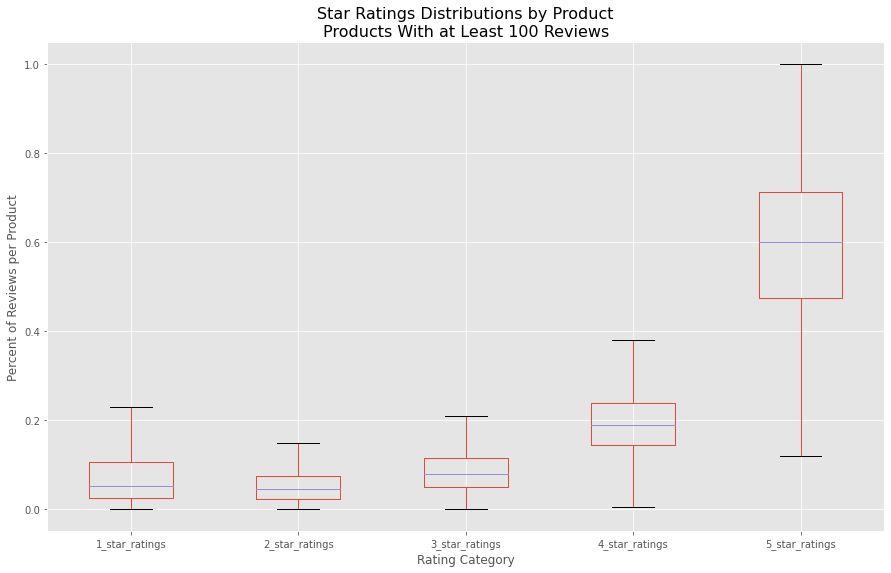

In [11]:
amazon100_df.boxplot(column=['1_star_ratings', '2_star_ratings', '3_star_ratings', '4_star_ratings', '5_star_ratings'], \
                     figsize=(15,9), showfliers=False)
plt.title('Star Ratings Distributions by Product\nProducts With at Least 100 Reviews', fontsize=16)
plt.ylabel('Percent of Reviews per Product')
plt.xlabel('Rating Category')

Text(0.5, 0, 'Rating Category')

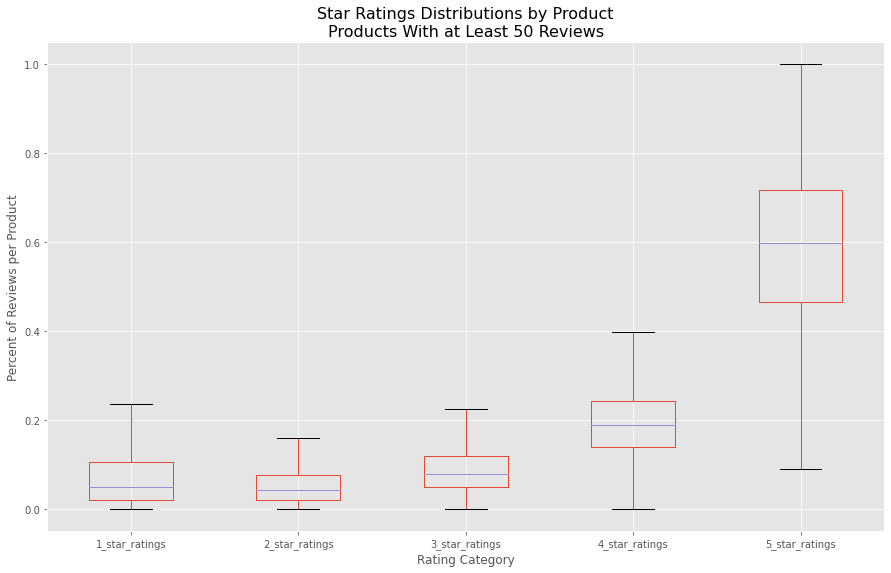

In [12]:
amazon50_df.boxplot(column=['1_star_ratings', '2_star_ratings', '3_star_ratings', '4_star_ratings', '5_star_ratings'], \
                    figsize=(15,9), showfliers=False)
plt.title('Star Ratings Distributions by Product\nProducts With at Least 50 Reviews', fontsize=16)
plt.ylabel('Percent of Reviews per Product')
plt.xlabel('Rating Category')

Text(0.5, 0, 'Rating Category')

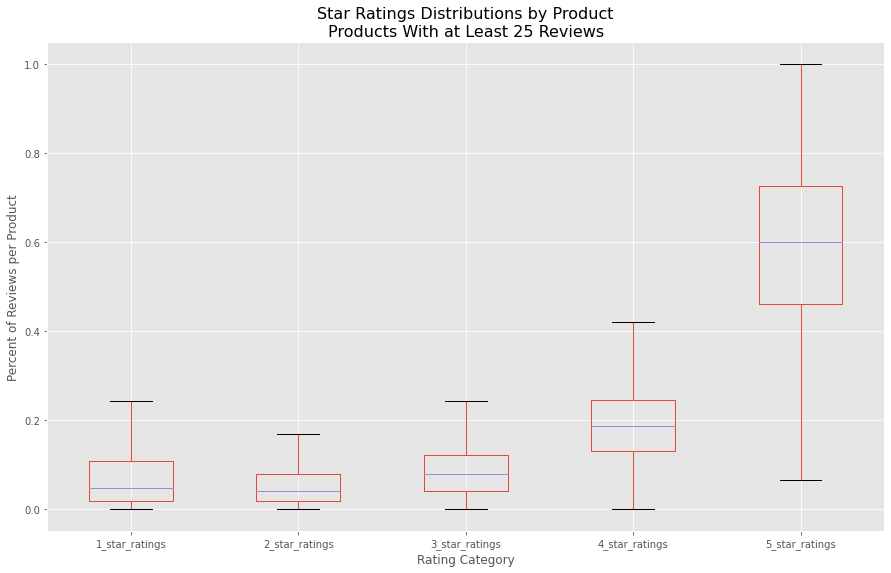

In [13]:
amazon25_df.boxplot(column=['1_star_ratings', '2_star_ratings', '3_star_ratings', '4_star_ratings', '5_star_ratings'], \
                    figsize=(15,9), showfliers=False)
plt.title('Star Ratings Distributions by Product\nProducts With at Least 25 Reviews', fontsize=16)
plt.ylabel('Percent of Reviews per Product')
plt.xlabel('Rating Category')

Even the distribution itself stays fairly constant, not just the overall average. This really is surprising to me. And there is 5x the product data in the 25+ reviews dataset as in the 100+ dataset, so this isnt simply plotting almost the same dataset three times. 

## New Section: Review Size Analysis

Typical product's review distribution (based on medians from 50+ reviews/product, data from amazon50_df.describe()):
Average Rating: 4.26
1-star percentage: 0.050
2-star percentage: 0.042
3-star percentage: 0.079
4-star percentage: 0.185
5-star percentage: 0.598
Sum of percentages: 0.954

I will look for a product with characteristics similar to this and a large review size. 

In [14]:
# Review size over 5,000
amazon50_df[:217][(amazon50_df['average_rating'] > 4.15) & (amazon50_df['average_rating'] < 4.35)]\
[(amazon50_df['1_star_ratings'] > 0.03) & (amazon50_df['1_star_ratings'] < 0.07)]

<ipython-input-14-4e0a9fef644c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amazon50_df[:217][(amazon50_df['average_rating'] > 4.15) & (amazon50_df['average_rating'] < 4.35)]\
<ipython-input-14-4e0a9fef644c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amazon50_df[:217][(amazon50_df['average_rating'] > 4.15) & (amazon50_df['average_rating'] < 4.35)]\


,item,average_rating,total_ratings,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings
19,0439023513,4.232677,14114.0,0.592036,0.193567,0.112938,0.057957,0.043503
21,B009HKL4B8,4.282102,13527.0,0.612331,0.215865,0.077031,0.031123,0.063650
32,B00BWYQ9YE,4.296768,12316.0,0.626177,0.189997,0.087691,0.046687,0.049448
35,B006GWO5WK,4.314657,12226.0,0.663422,0.158433,0.075495,0.034680,0.067970
56,B003EYVXV4,4.191627,10223.0,0.532133,0.263328,0.114350,0.044410,0.045779
60,0345803493,4.301002,9980.0,0.661523,0.143587,0.087475,0.049198,0.058216
66,B007T35O7U,4.284552,9710.0,0.625953,0.187127,0.087024,0.045314,0.054583
67,0345803507,4.282622,9610.0,0.665765,0.130489,0.090531,0.047034,0.066181
75,B008OHNZI0,4.282958,8966.0,0.643877,0.171648,0.071715,0.049074,0.063685
78,B00CDBTQCW,4.268442,8676.0,0.581720,0.239742,0.086791,0.048755,0.042992


Going to use item 0439023513 to conduct my sampling from. 

In [15]:
random_sample_item = amazon50_df[amazon50_df['item'] == '0439023513']

Since I need to do this analysis with my original, uncondensed reviews database I will conduct it in a new notebook.

## After Conducting my sample size analysis in amazon_reviews_cutoff_analysis.ipynb, I am rerunning this analysis for a minimum review size of 300 reviews. This is the number of reviews it takes before your 90% confidence interval in the accuracy of the average product rating is less than +- 0.10 stars.

In [16]:
amazon300_df = amazon25_df[:25776]
amazon300_df

,item,average_rating,total_ratings,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings
0,B0054JZC6E,4.329313,25368.0,0.523810,0.330377,0.114436,0.014073,0.017305
1,B00FAPF5U0,4.369381,24024.0,0.637696,0.209832,0.079878,0.029346,0.043248
2,B009UX2YAC,4.674445,23956.0,0.788529,0.144056,0.038654,0.010853,0.017908
3,0439023483,4.644406,21398.0,0.770726,0.155529,0.039957,0.015001,0.018787
4,030758836X,3.794433,19867.0,0.388081,0.278351,0.160266,0.086525,0.086777
...,...,...,...,...,...,...,...,...
25771,B001VP8316,4.433333,300.0,0.703333,0.123333,0.106667,0.036667,0.030000
25772,B0000ALFVD,4.250000,300.0,0.546667,0.266667,0.113333,0.036667,0.036667
25773,B005YR0F40,4.350000,300.0,0.676667,0.150000,0.063333,0.066667,0.043333
25774,B0071O4EZK,4.426667,300.0,0.656667,0.216667,0.070000,0.010000,0.046667


25,776 unique products have 300+ reviews.

In [17]:
amazon300_df.describe()

,average_rating,total_ratings,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings
count,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000,25776.000000
mean,4.172036,731.233900,0.596711,0.190610,0.081504,0.050354,0.080821
std,0.468310,980.876361,0.158439,0.064715,0.042796,0.035134,0.085428
min,1.020270,300.000000,0.002252,0.002252,0.000000,0.000000,0.000000
25%,3.943860,363.000000,0.492630,0.146154,0.049722,0.023965,0.026266
50%,4.268086,475.000000,0.608696,0.187625,0.075055,0.042520,0.053722
75%,4.507189,728.000000,0.713346,0.230478,0.106231,0.068966,0.104137
max,4.986034,25368.000000,0.986034,0.530928,0.345865,0.386581,0.993243


In [18]:
amazon50_df.describe()

,average_rating,total_ratings,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings
count,256227.000000,256227.000000,256227.000000,256227.000000,256227.000000,256227.000000,256227.000000
mean,4.150180,166.901244,0.584797,0.194353,0.087593,0.052746,0.080511
std,0.513963,367.756439,0.175043,0.078978,0.054352,0.043368,0.095337
min,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.900000,64.000000,0.465517,0.138462,0.047619,0.019231,0.019231
50%,4.258741,90.000000,0.598291,0.188235,0.078652,0.042403,0.049645
75%,4.521127,156.000000,0.716667,0.242105,0.118056,0.075472,0.105263
max,5.000000,25368.000000,1.000000,0.716667,0.532258,0.397059,1.000000


Amazing consistency in average rating and star category percentages across all different cutoff levels with massively varying amount of data.

Text(0, 0.5, 'Normalized Product Count')

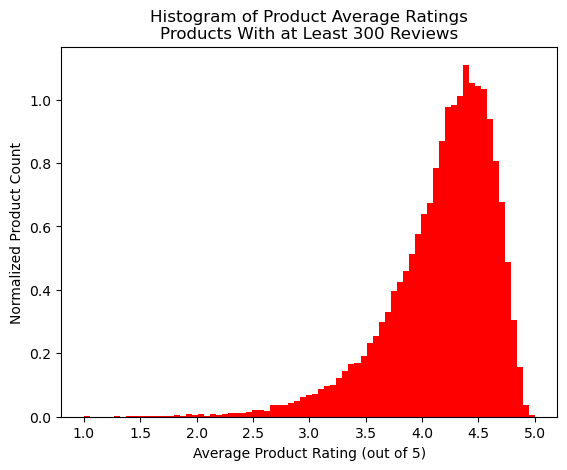

In [19]:
plt.style.use('default')
plt.hist(amazon300_df['average_rating'], bins=75, range=(1,5), density=True, color='red')
plt.title('Histogram of Product Average Ratings\nProducts With at Least 300 Reviews')
plt.xlabel('Average Product Rating (out of 5)')
plt.ylabel('Normalized Product Count')
#plt.savefig('Hist300.jpg')

Text(0.5, 0, 'Rating Category')

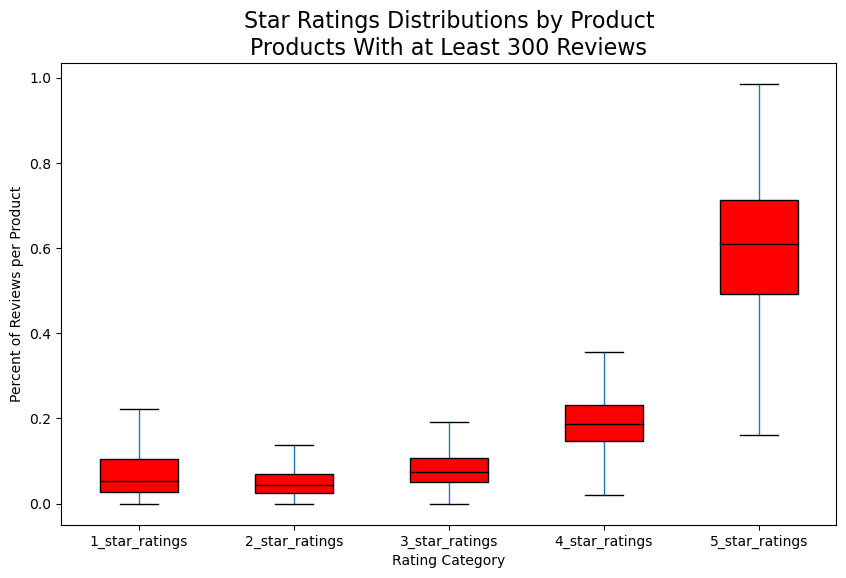

In [20]:
amazon300_df.boxplot(column=['1_star_ratings', '2_star_ratings', '3_star_ratings', '4_star_ratings', '5_star_ratings'], \
                    figsize=(10,6), showfliers=False, grid=False, patch_artist=True, 
                     boxprops=dict(facecolor='red', color='black'),
            medianprops=dict(color='black'))
plt.title('Star Ratings Distributions by Product\nProducts With at Least 300 Reviews', fontsize=16)
plt.ylabel('Percent of Reviews per Product')
plt.xlabel('Rating Category')
#plt.savefig('boxplot_dist_300.png')
#plt.savefig('boxplot_dist_300.pdf')
#plt.savefig('boxplot_dist_300.jpg')

In [21]:
from scipy import stats

In [22]:
cumulative_frequency_data = stats.cumfreq(amazon300_df['average_rating'], numbins=200, defaultreallimits=(1,5))
cumulative_frequency_data

CumfreqResult(cumcount=array([0.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
       2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
       2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
       3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00,
       4.0000e+00, 6.0000e+00, 6.0000e+00, 6.0000e+00, 8.0000e+00,
       9.0000e+00, 9.0000e+00, 1.0000e+01, 1.1000e+01, 1.3000e+01,
       1.3000e+01, 1.5000e+01, 1.6000e+01, 1.8000e+01, 1.9000e+01,
       2.2000e+01, 2.4000e+01, 2.4000e+01, 2.6000e+01, 2.8000e+01,
       3.1000e+01, 3.2000e+01, 3.5000e+01, 3.5000e+01, 3.6000e+01,
       3.8000e+01, 3.9000e+01, 4.7000e+01, 4.8000e+01, 4.9000e+01,
       5.5000e+01, 5.8000e+01, 6.4000e+01, 6.5000e+01, 6.6000e+01,
       6.9000e+01, 7.3000e+01, 8.0000e+01, 8.3000e+01, 8.3000e+01,
       8.7000e+01, 9.0000e+01, 9.7000e+01, 1.0200e+02, 1.0700e+02,
       1.1600e+02, 1.2100e+02, 1.2800e+02, 1.3400e+02, 1.3700e+02,
       1.4600e+02, 1.5300e+02, 1.5900e+

In [23]:
cumulative_frequencies = list(pd.Series(cumulative_frequency_data[0])/len(amazon300_df['average_rating']))
starting_point = list(cumulative_frequency_data)[1]
cum_bin_size = list(cumulative_frequency_data)[2]
print(cumulative_frequencies)
print(starting_point)
print(cum_bin_size)


[0.0, 7.759155803848541e-05, 7.759155803848541e-05, 7.759155803848541e-05, 7.759155803848541e-05, 7.759155803848541e-05, 7.759155803848541e-05, 7.759155803848541e-05, 7.759155803848541e-05, 7.759155803848541e-05, 7.759155803848541e-05, 7.759155803848541e-05, 7.759155803848541e-05, 7.759155803848541e-05, 7.759155803848541e-05, 0.00011638733705772812, 0.00011638733705772812, 0.00011638733705772812, 0.00011638733705772812, 0.00011638733705772812, 0.00015518311607697082, 0.00023277467411545624, 0.00023277467411545624, 0.00023277467411545624, 0.00031036623215394165, 0.00034916201117318437, 0.00034916201117318437, 0.0003879577901924271, 0.00042675356921166975, 0.0005043451272501552, 0.0005043451272501552, 0.0005819366852886406, 0.0006207324643078833, 0.0006983240223463687, 0.0007371198013656114, 0.0008535071384233395, 0.000931098696461825, 0.000931098696461825, 0.0010086902545003104, 0.0010862818125387957, 0.001202669149596524, 0.0012414649286157666, 0.0013578522656734948, 0.0013578522656734

In [24]:
#Create the bins for my cumulative frequency plot
bins=list(np.linspace(1.02,5,200))
for ind, bin in enumerate(bins):
    bins[ind] = round(bin,2)
bins

cum_freq_table = pd.DataFrame({'star_rating':bins, 'cumulative_frequency':cumulative_frequencies})
cum_freq_table

,star_rating,cumulative_frequency
0,1.02,0.000000
1,1.04,0.000078
2,1.06,0.000078
3,1.08,0.000078
4,1.10,0.000078
...,...,...
195,4.92,0.999030
196,4.94,0.999496
197,4.96,0.999806
198,4.98,0.999922


In [25]:
cum_freq_table_trunc = cum_freq_table[4:200:10]
cum_freq_table_trunc['cumulative_frequency'] =  cum_freq_table_trunc['cumulative_frequency'].round(2)
cum_freq_table_trunc = cum_freq_table_trunc.sort_values('star_rating', ascending=False)
cum_freq_table_trunc


<ipython-input-25-73ba097ff090>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cum_freq_table_trunc['cumulative_frequency'] =  cum_freq_table_trunc['cumulative_frequency'].round(2)


,star_rating,cumulative_frequency
194,4.9,1.00
184,4.7,0.93
174,4.5,0.74
164,4.3,0.53
154,4.1,0.35
144,3.9,0.23
134,3.7,0.14
124,3.5,0.09
114,3.3,0.05
104,3.1,0.03


In [26]:
# Commented this out, only need to do this once.
# cum_freq_table.to_csv(r'rough_data\amazon_dataset\amzn300_cum_freq_table.csv', index=False)

<BarContainer object of 200 artists>

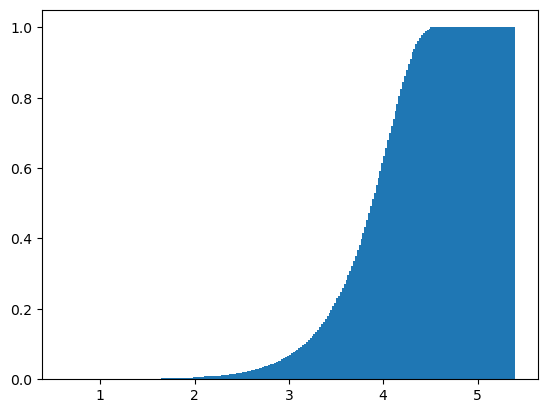

In [27]:
# Look into a better way to visualize this using matplotlib plots or seaborn plots. 
# There should be an easy way to do it well.
plt.bar(x=cum_freq_table['star_rating'], height=cum_freq_table['cumulative_frequency'])

I had planned to make a custom score for each product, bsed on weightings of high scores (4 and 5) and low scores (1 and 2), but seeing how many reviews a product needed just to take meaningful information from its average rating deterred me. I weighting that more strongly depends upon the shape of the distribution would need an even greater number of reviews to be meaningful, which I did not want. 

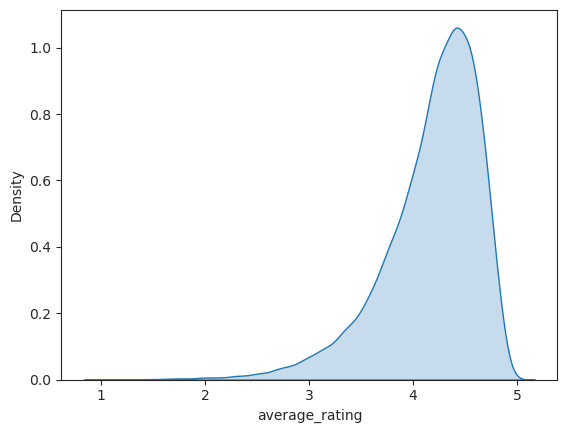

In [28]:
import seaborn as sns
with sns.axes_style("ticks"):
    sns.kdeplot(amazon300_df['average_rating'], shade=True)
    sns.axes_style()

Making some new graphs that I want to have for my presentation

In [29]:
# Will probably Delete

# bins=[]
# buckets = np.linspace(1.1, 5, 40, endpoint=True).tolist()
# for i in buckets:
#     bins.append(round(i,1))

# test_25 = amazon25_df
# test_25['rating_bin'] = pd.cut(test_25['average_rating'], 40, right=True, labels=bins, precision=1)
# test_25 = test_25.groupby('rating_bin').agg('count')['item']
# test_25.name='25_reviews'

# sns.kdeplot([amazon25_df['average_rating'], amazon50_df['average_rating']])


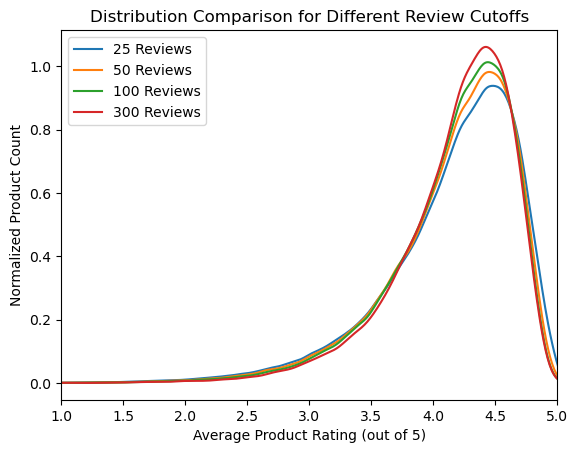

In [32]:
df_list=[amazon25_df, amazon50_df, amazon100_df, amazon300_df]
fig, ax = plt.subplots(1,1)
for i in df_list:
    i['average_rating'].plot(kind='density', xlim=(1,5))
plt.title('Distribution Comparison for Different Review Cutoffs')
plt.xlabel(r'Average Product Rating (out of 5)')
plt.ylabel('Normalized Product Count')
plt.legend(['25 Reviews', '50 Reviews', '100 Reviews', '300 Reviews'])
plt.savefig('distro_compares.png')
plt.savefig('distro_compares.jpg')
plt.savefig('distro_compares.pdf')